<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install impedance -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 795.1 kB/s eta 0:00:00


In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit
from google.colab import files


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1630, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 1630 (delta 143), reused 17 (delta 17), pack-reused 1411 (from 1)
Receiving objects: 100% (1630/1630), 112.66 MiB | 8.80 MiB/s, done.
Resolving deltas: 100% (965/965), done.
Updating files: 100% (196/196), done.


'/content'

In [11]:
%cd "/content/gator/data/"

/content/gator/data


### Blue sample : High to low

In [33]:
def nyquist_and_fit(filename):
  freqs, Z = preprocessing.readZPlot(filename)

  circuit = 'p(R0-W0,C0)'
  init = [10**6, 10**-7, 10**-8]

  circuit = CustomCircuit(circuit, initial_guess=init)
  circuit.fit(freqs, Z)
  Z_fit = circuit.predict(freqs)

  data = plt.plot(Z.real, -Z.imag, '.')
  plt.plot(Z_fit.real, -Z_fit.imag, '-', color=data[0].get_color())

  print(circuit)

/content/gator/data

Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.15e+06  (+/- 6.90e-24) [Ohm]
     W0 = 2.45e+05  (+/- 1.56e-24) [Ohm sec^-1/2]
     C0 = 5.62e-12  (+/- 3.34e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.19e+07  (+/- 1.04e-24) [Ohm]
     W0 = 5.44e+06  (+/- 3.15e-25) [Ohm sec^-1/2]
     C0 = 1.86e-11  (+/- 7.09e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 9.69e+06  (+/- 1.47e-24) [Ohm]
     W0 = 4.24e+06  (+/- 5.13e-25) [Ohm sec^-1/2]
     C0 = 2.98e-11  (+/- 7.69e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

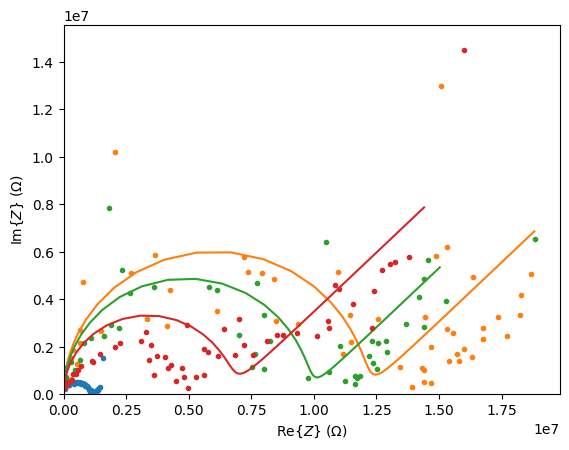

In [39]:
%cd "/content/gator/data/"
nyquist_and_fit('06-20/LiTao3_htol.z')
nyquist_and_fit('06-24/LiTao3_Blue.z')
nyquist_and_fit('06-24/LiTao3_Blackltoh.z')
nyquist_and_fit('07-30/GY1_htol.z')
plt.ylim(0)
plt.xlim(0)
plt.ylabel('$\mathrm{Im}\{ Z \} \;(\Omega)$')
plt.xlabel('$\mathrm{Re}\{ Z \} \;(\Omega)$')

plt.savefig('eis_big.svg')
files.download('eis_big.svg')


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.15e+06  (+/- 6.90e-24) [Ohm]
     W0 = 2.45e+05  (+/- 1.56e-24) [Ohm sec^-1/2]
     C0 = 5.62e-12  (+/- 3.34e-10) [F]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

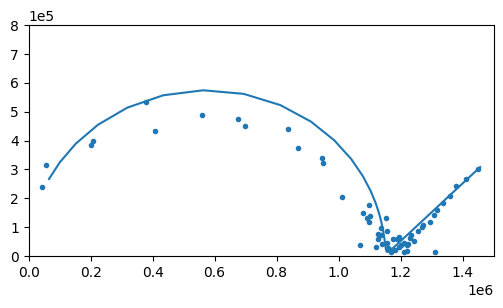

In [38]:
plt.figure(figsize=(6,3))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
nyquist_and_fit('06-20/LiTao3_htol.z')
plt.ylim(0,0.8e6)
plt.xlim(0,1.5e6)
plt.savefig('eis_inset.svg')
files.download('eis_inset.svg')
